In [222]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../../')
import modules.simulation as simulation
import pyccl as ccl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [223]:
simulator = simulation.UniverseSimulator( default_config_path = '../../config/capish.ini', 
                                         variable_params_names = ['Omega_m', 'sigma_8'])

In [224]:
new_config = simulator.new_config_files([0.25, 0.8])

In [225]:
log10m_true, z_true = simulator.halo_catalogue_class.get_halo_catalogue(new_config)
richness, log10mWL, z_obs = simulator.cluster_catalogue_class.get_cluster_catalogue(log10m_true, z_true, new_config)

In [226]:
count, mean_mass = simulator.summary_statistics_class.get_summary_statistics(richness, log10mWL, z_obs, new_config)

In [227]:
new_config['summary_statistics']['which'] = '3d_count'

In [228]:
new_config['summary_statistics']['which']

'3d_count'

In [229]:
threed_count = simulator.summary_statistics_class.get_summary_statistics(richness, log10mWL, z_obs, new_config)

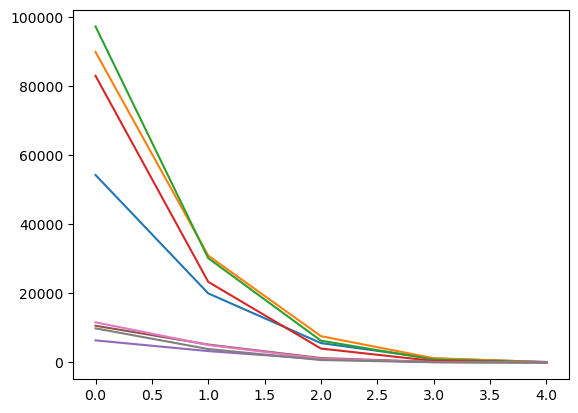

In [235]:
plt.plot(count.T[:,:])
plt.plot(np.mean(threed_count, axis=2)[:,:])